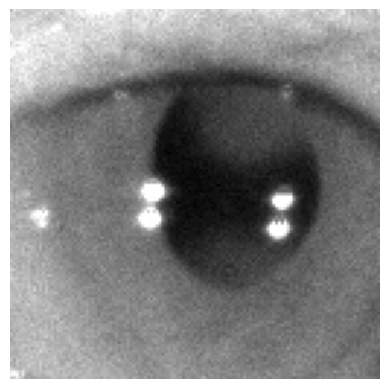

In [184]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema
# 1. Load and crop
path = "output/490.png"
eye_crop = cv2.imread(path)

# show the cropped image
eye_gray = cv2.cvtColor(eye_crop, cv2.COLOR_BGR2GRAY)
plt.imshow(eye_gray, cmap='gray')
plt.axis('off')
plt.show()

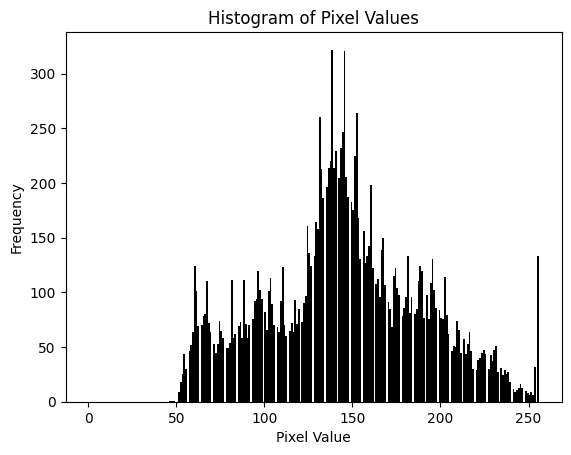

Average color (BGR): 144


In [185]:
# generate frequency of each pixel value from graysvale
# 
# fig = plt.figure(figsize=(10, 7))

plt.hist(eye_gray.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
# get average color of the cropped image
average_color = int(np.mean(eye_crop, axis=(0, 1))[0])
print(f"Average color (BGR): {average_color}")


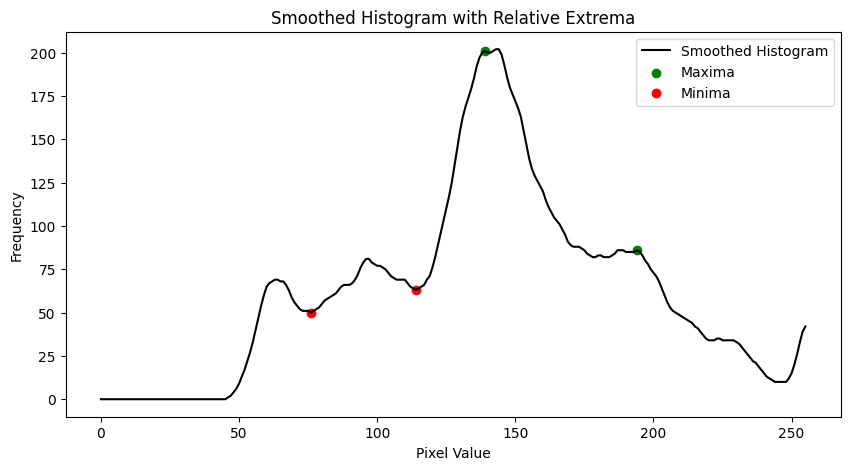

In [186]:
# gaussian noise filter for histogram
hist, bin_edges = np.histogram(eye_gray.ravel(), bins=256, range=(0, 256))

# Smooth the histogram using a Gaussian filter
smoothed = gaussian_filter1d(hist, sigma=3)

# Identify relative maxima and minima
diff = np.diff(np.sign(np.diff(smoothed)))
maxima = np.where(diff == -2)[0] + 1
minima = np.where(diff == 2)[0] + 1
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(smoothed, label='Smoothed Histogram', color='black')
plt.scatter(maxima, smoothed[maxima], color='green', label='Maxima')
plt.scatter(minima, smoothed[minima], color='red', label='Minima')
plt.title('Smoothed Histogram with Relative Extrema')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


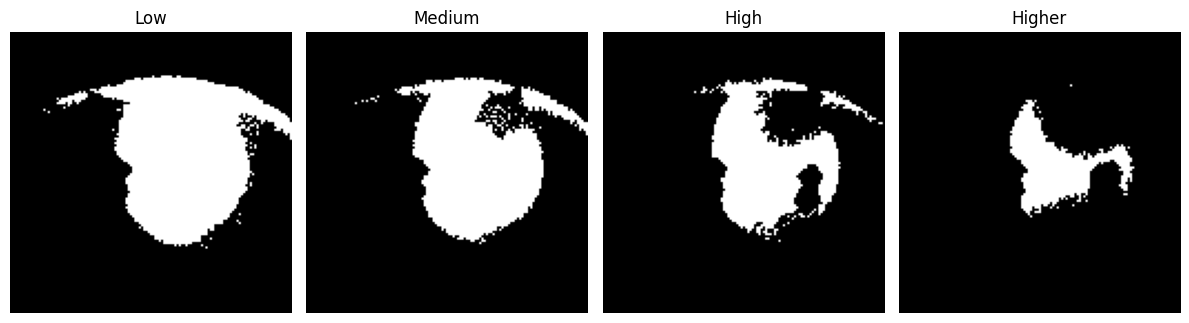

Average pixel values: [np.float64(63.777667555335114), np.float64(52.173104346208696), np.float64(37.42234484468969), np.float64(18.118296236592474)]


In [187]:
eye_gray = cv2.cvtColor(eye_crop, cv2.COLOR_BGR2GRAY)
athresh = minima[0]  # Filter out negative minima
# Define three threshold values
thresholds = [athresh+35, athresh+25, athresh+15, athresh-5]  # Low, Medium, High
# thresholds = [15, 20, 25]  # Low, Medium, High
titles = ['Low', 'Medium', 'High', 'Higher']
images = []
hists = []
bounds = []
avgs = []
for t in thresholds:
    # Apply binary inverse threshold
    _, eye_thresh = cv2.threshold(eye_gray, t, 255, cv2.THRESH_BINARY_INV)

    # Fill holes using flood fill
    h, w = eye_thresh.shape
    mask = np.zeros((h + 2, w + 2), np.uint8)
    flood = eye_thresh.copy()
    cv2.floodFill(flood, mask, (0, 0), 255)
    flood_inv = cv2.bitwise_not(flood)
    eye_thresh_filled = cv2.bitwise_or(eye_thresh, flood_inv)
    # eye_thresh_filled = cv2.morphologyEx(eye_thresh_filled, cv2.MORPH_CLOSE, np.zeros((3, 3), np.uint8))
    # eye_thresh_filled = cv2.morphologyEx(eye_thresh_filled, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
    images.append(eye_thresh_filled)
    x_hist = np.sum(eye_thresh_filled, axis=0)
    hists.append(x_hist)
    # get and store average color of the image
    avg_color = np.mean(eye_thresh_filled)
    avgs.append(avg_color)

# Plot the images side by side
plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
print("Average pixel values:", avgs)

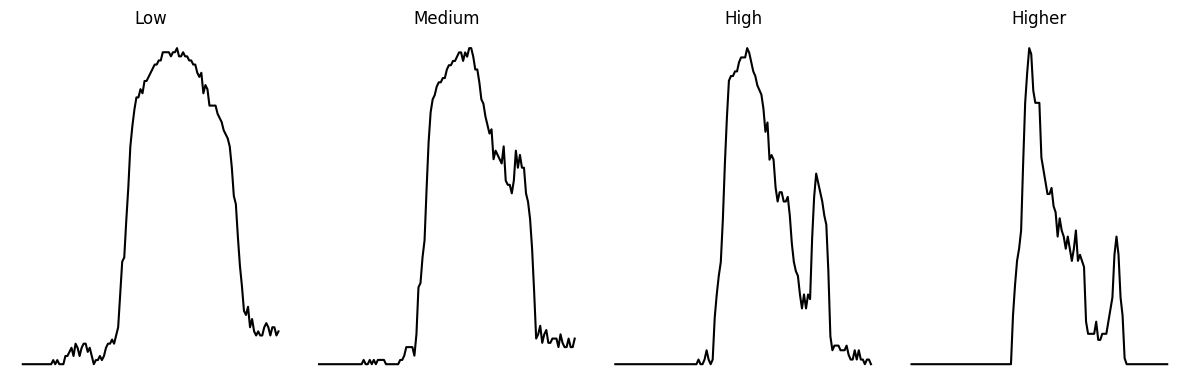

In [188]:
# for each threshold, plot the histogram of the x-axis
plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.plot(hists[i], color='black')
    plt.title(titles[i])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.axis('off')
plt.tight_layout()
plt.show()

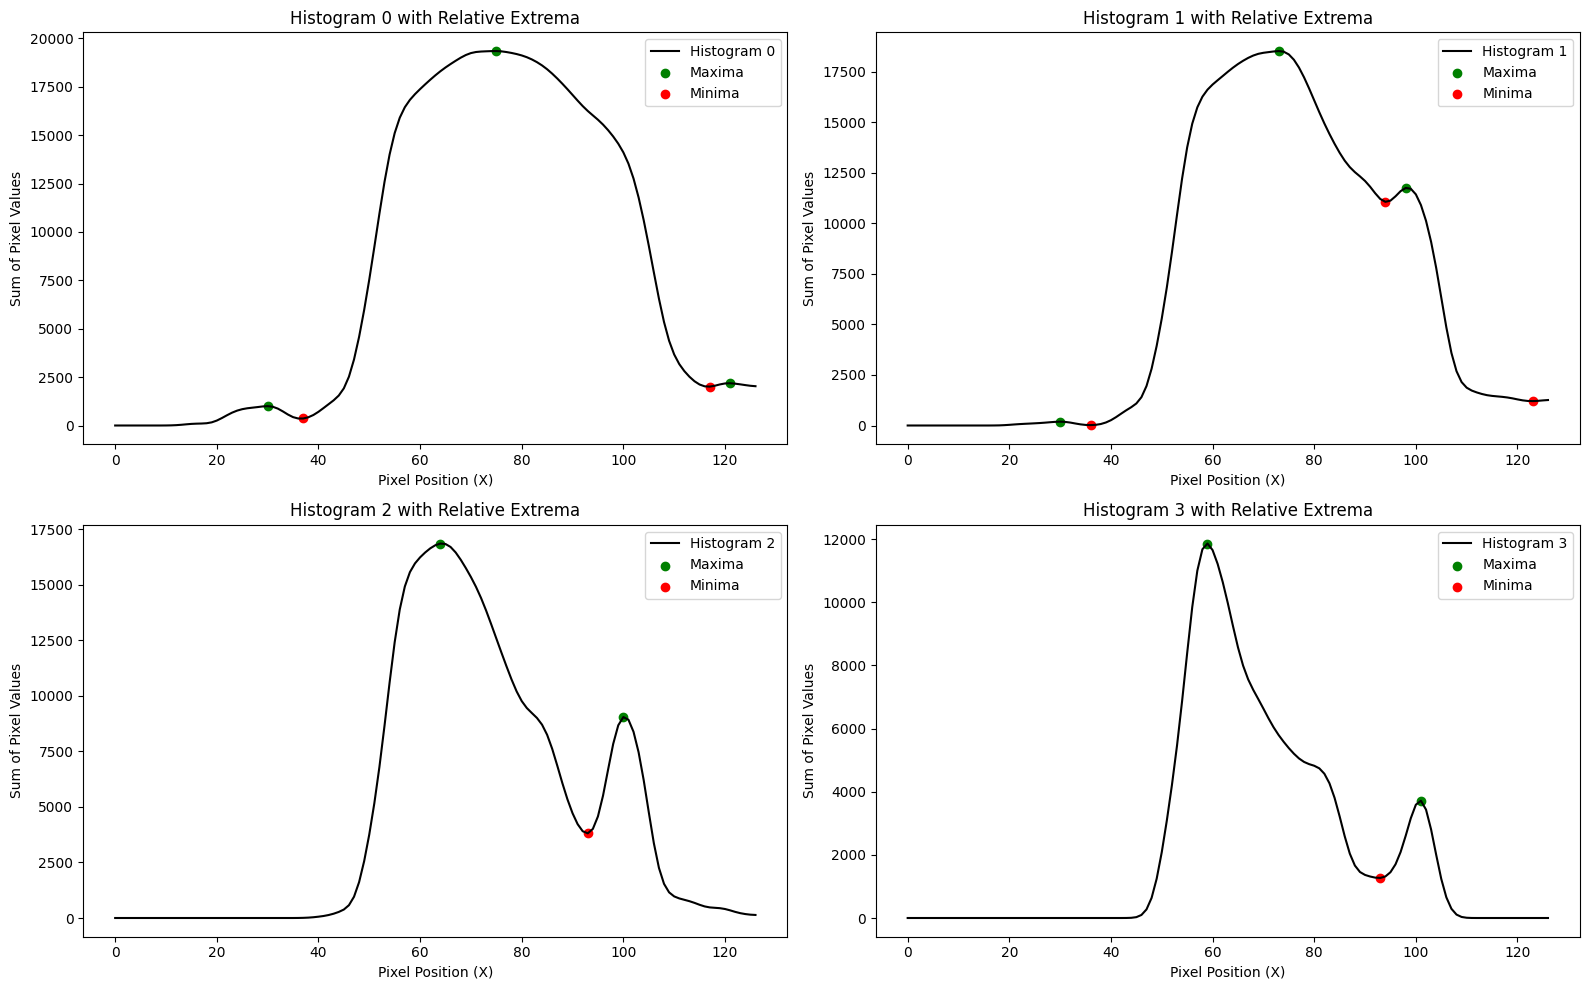

In [189]:
plt.figure(figsize=(16, 10))

for i in range(4):
    # Smooth the histogram
    hists[i] = gaussian_filter1d(hists[i], sigma=2)

    # Find local maxima and minima
    maxima = argrelextrema(hists[i], np.greater)[0]
    minima = argrelextrema(hists[i], np.less)[0]

    # Plot histogram and extrema
    plt.subplot(2, 2, i + 1)
    plt.plot(hists[i], label=f'Histogram {i}', color='black')
    plt.scatter(maxima, hists[i][maxima], color='green', label='Maxima')
    plt.scatter(minima, hists[i][minima], color='red', label='Minima')
    plt.title(f"Histogram {i} with Relative Extrema")
    plt.xlabel('Pixel Position (X)')
    plt.ylabel('Sum of Pixel Values')
    plt.legend()

plt.tight_layout()
plt.show()